In [151]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from geopy.exc import GeocoderTimedOut 
from geopy.geocoders import Nominatim 
import geopandas
import descartes
from opencage.geocoder import OpenCageGeocode
from pprint import pprint
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv('/Users/felix/Documents/Ironhack/Course/Week_5/data_mid_bootcamp_project_regression/regression_data_clean.csv')

In [3]:
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/14,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2/23/15,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,6/23/14,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,1/16/15,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [4]:
df.dtypes

id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

In [5]:
#convert object(date) to datetime(date)
df['date'] =  pd.to_datetime(df['date'], format='%m/%d/%y')
#leave 


In [6]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [7]:
size=df[['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']]
size


,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,1180,5650,1180,0,1340,5650
1,2570,7242,2170,400,1690,7639
2,770,10000,770,0,2720,8062
3,1960,5000,1050,910,1360,5000
4,1680,8080,1680,0,1800,7503
...,...,...,...,...,...,...
21592,1530,1131,1530,0,1530,1509
21593,2310,5813,2310,0,1830,7200
21594,1020,1350,1020,0,1020,2007
21595,1600,2388,1600,0,1410,1287


In [8]:
df.shape

(21597, 21)

In [9]:
df.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [10]:
df.nunique()

id               21420
date               372
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
price             3622
dtype: int64

In [11]:
df.isna().any()

id               False
date             False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
price            False
dtype: bool

In [12]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [13]:
df.drop(df.index[df['bedrooms'] == 33], inplace = True)
df.drop(df.index[df['bedrooms'] == 11], inplace = True)
df.drop(df.index[df['bedrooms'] == 10], inplace = True)

#drop outliers

In [14]:
###check out what values and adventures lie ahead in each of those magical columns

In [15]:
df['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3047
2.25    2047
2.00    1929
1.50    1445
2.75    1185
3.00     751
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      12
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

df.drop(df.index[df['bathrooms'] == 7.75], inplace = True)
df.drop(df.index[df['bathrooms'] == 6.75], inplace = True)
df.drop(df.index[df['bathrooms'] == 6.50], inplace = True)
df.drop(df.index[df['bathrooms'] == 8.00], inplace = True)
df.drop(df.index[df['bathrooms'] == 6.25], inplace = True)
df.drop(df.index[df['bathrooms'] == 0.50], inplace = True)
df.drop(df.index[df['bathrooms'] == 5.75], inplace = True)

In [16]:
df['floors'].value_counts()

1.0    10671
2.0     8232
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [17]:
#keep all values

In [18]:
df['waterfront'].value_counts()

0    21429
1      163
Name: waterfront, dtype: int64

In [19]:
df['view'].value_counts()

0    19471
2      960
3      510
1      332
4      319
Name: view, dtype: int64

In [20]:
df['condition'].value_counts()

3    14018
4     5675
5     1700
2      170
1       29
Name: condition, dtype: int64

In [21]:
df['grade'].value_counts()

7     8970
8     6065
9     2614
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [22]:
df['sqft_living'].value_counts()

1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1034, dtype: int64

In [23]:
df['sqft_living'].value_counts()

1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1034, dtype: int64

In [24]:
df['sqft_lot'].value_counts()

5000     358
6000     289
4000     251
7200     220
4800     119
        ... 
1448       1
38884      1
17313      1
35752      1
14321      1
Name: sqft_lot, Length: 9775, dtype: int64

In [25]:
df['sqft_above'].value_counts()

1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
2601      1
440       1
2473      1
2441      1
1975      1
Name: sqft_above, Length: 942, dtype: int64

In [26]:
df['sqft_basement'].value_counts()

0       13110
600       219
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [27]:
df['sqft_living15'].value_counts()

1540    197
1440    195
1560    192
1500    180
1460    169
       ... 
4890      1
2873      1
952       1
3193      1
2049      1
Name: sqft_living15, Length: 777, dtype: int64

In [28]:
#just to be sure which one is which:

In [29]:
sum(df['sqft_above']+df['sqft_basement'])

44912971

In [30]:
sum(df['sqft_living'])

44912971

In [31]:
sum(df['sqft_lot'])

326064392

In [32]:
sum(df['sqft_basement']+df['sqft_lot'])

332359847

In [33]:
df['sqft_basement'].value_counts()

0       13110
600       219
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [34]:
#check for duplicates
df[df.duplicated(keep=False)]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price


In [35]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [36]:
### replace yr_rennovated and sqft_basement with binary yes or no. No one cares how big your basement is. Get over it.

In [37]:
def rennovation(x):
    if x!= 0:
        return 1
    else:
        return 0

In [38]:
df['rennovated']=df['yr_renovated'].apply(rennovation)
df['basement']=df['sqft_basement'].apply(rennovation)

In [39]:
#drop original columns and

In [40]:
df = df.drop('yr_renovated',axis=1)
df = df.drop('sqft_basement',axis=1)


In [41]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price,rennovated,basement
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,1955,98178,47.5112,-122.257,1340,5650,221900,0,0
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,1951,98125,47.7210,-122.319,1690,7639,538000,1,1
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,1933,98028,47.7379,-122.233,2720,8062,180000,0,0
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,1965,98136,47.5208,-122.393,1360,5000,604000,0,1
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,1987,98074,47.6168,-122.045,1800,7503,510000,0,0


In [42]:
#determining multicolinerarity
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [43]:
X = df[['bedrooms','bathrooms','sqft_living','sqft_lot','sqft_above','basement','rennovated','sqft_living15','sqft_lot15']]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

         feature        VIF
0       bedrooms  14.357904
1      bathrooms  20.209044
2    sqft_living  81.957891
3       sqft_lot   2.356158
4     sqft_above  79.269869
5       basement   5.336404
6     rennovated   1.051230
7  sqft_living15  19.194133
8     sqft_lot15   2.559209


In [44]:
#drop some columns

In [45]:
df = df.drop('sqft_above',axis=1)
df = df.drop('sqft_living15',axis=1)


In [46]:
X = df[['bedrooms','bathrooms','sqft_living','sqft_lot','basement','rennovated','sqft_lot15','grade']]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

       feature        VIF
0     bedrooms  19.308133
1    bathrooms  21.660521
2  sqft_living  16.915892
3     sqft_lot   2.351309
4     basement   1.733823
5   rennovated   1.048738
6   sqft_lot15   2.544774
7        grade  23.458177


In [47]:
#bathroomsgrade and sqft_lot have to go as well
df = df.drop('bathrooms',axis=1)

In [48]:
df.head()

,id,date,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long,sqft_lot15,price,rennovated,basement
0,7129300520,2014-10-13,3,1180,5650,1.0,0,0,3,7,1955,98178,47.5112,-122.257,5650,221900,0,0
1,6414100192,2014-12-09,3,2570,7242,2.0,0,0,3,7,1951,98125,47.7210,-122.319,7639,538000,1,1
2,5631500400,2015-02-25,2,770,10000,1.0,0,0,3,6,1933,98028,47.7379,-122.233,8062,180000,0,0
3,2487200875,2014-12-09,4,1960,5000,1.0,0,0,5,7,1965,98136,47.5208,-122.393,5000,604000,0,1
4,1954400510,2015-02-18,3,1680,8080,1.0,0,0,3,8,1987,98074,47.6168,-122.045,7503,510000,0,0


In [49]:
X = df[['sqft_living','basement','rennovated','view','waterfront']]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

       feature       VIF
0  sqft_living  1.810587
1     basement  1.710318
2   rennovated  1.058719
3         view  1.403686
4   waterfront  1.207861


In [50]:
# individual correlations:

In [51]:
corrMatrix=df.corr()

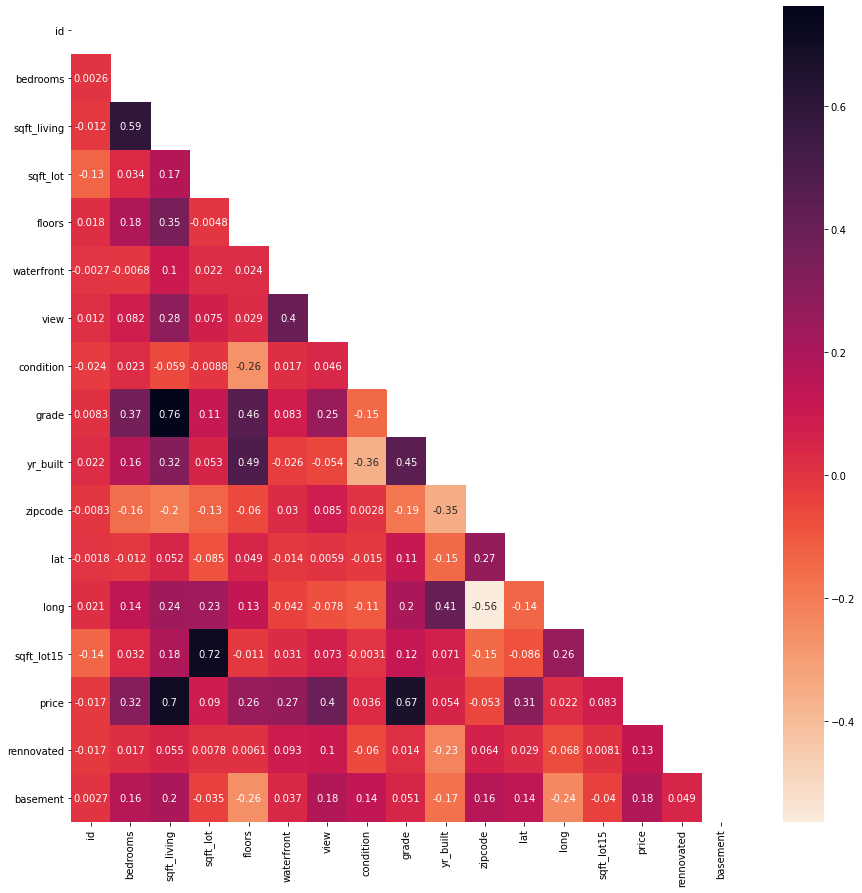

In [52]:
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corrMatrix, mask=mask, annot=True, cmap="rocket_r")
plt.show()

In [53]:
#since we care most about predicting price, lets look at that one:
corrMatrix['price']


id            -0.016690
bedrooms       0.316939
sqft_living    0.701929
sqft_lot       0.089898
floors         0.256904
waterfront     0.266427
view           0.397285
condition      0.036056
grade          0.667971
yr_built       0.053914
zipcode       -0.053299
lat            0.306686
long           0.022000
sqft_lot15     0.082866
price          1.000000
rennovated     0.126194
basement       0.179983
Name: price, dtype: float64

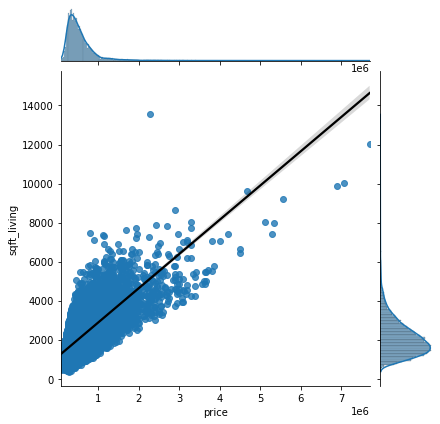

In [54]:
sns.jointplot(x="price", y="sqft_living", data=df, kind='reg',joint_kws={'line_kws':{'color':'black'}})
#makes sense, the bigger the place the more expensive the property

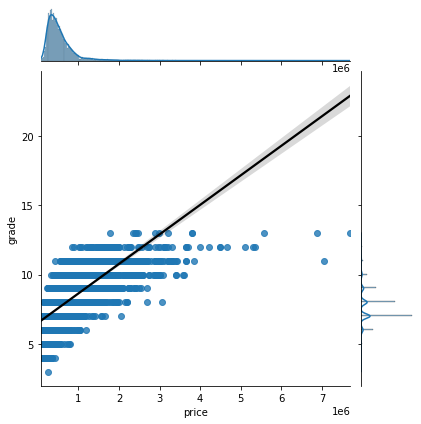

In [55]:
sns.jointplot(x="price", y="grade", data=df, kind='reg',joint_kws={'line_kws':{'color':'black'}})


In [56]:
# for first iteration of model use : 
MLdf=df[['sqft_living','basement','rennovated','view','waterfront','grade','price']]

In [57]:
MLdf

,sqft_living,basement,rennovated,view,waterfront,grade,price
0,1180,0,0,0,0,7,221900
1,2570,1,1,0,0,7,538000
2,770,0,0,0,0,6,180000
3,1960,1,0,0,0,7,604000
4,1680,0,0,0,0,8,510000
...,...,...,...,...,...,...,...
21592,1530,0,0,0,0,8,360000
21593,2310,0,0,0,0,8,400000
21594,1020,0,0,0,0,7,402101
21595,1600,0,0,0,0,8,400000


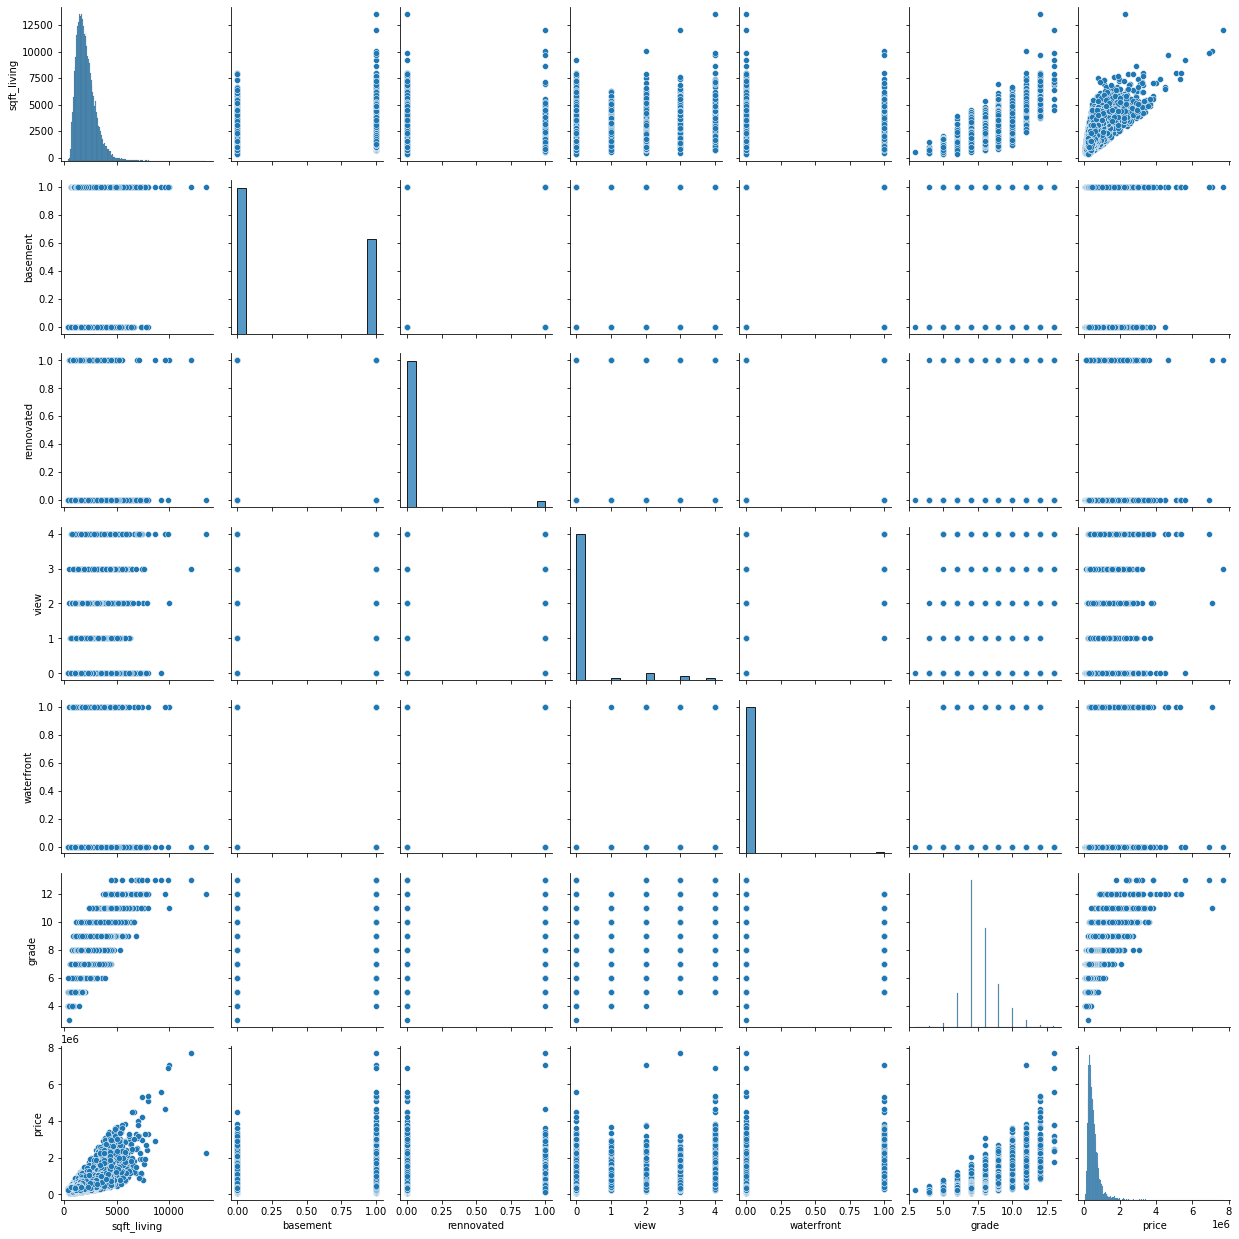

In [58]:
sns.pairplot(data=MLdf)

In [ ]:
sns.pairplot(data=MLdf,kind="kde")


array([[<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'basement'}>,
        <AxesSubplot:title={'center':'rennovated'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'grade'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

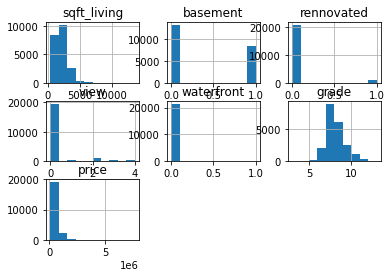

In [59]:
MLdf.hist()

In [60]:
#categorical variable (grade) is already in numerical, so no hot encoder necesssary, no null or nan values either


In [61]:
MLdf_corr =MLdf.corr()
MLdf_corr

,sqft_living,basement,rennovated,view,waterfront,grade,price
sqft_living,1.000000,0.204085,0.054909,0.284580,0.103908,0.762978,0.701929
basement,0.204085,1.000000,0.048701,0.181908,0.037216,0.051330,0.179983
rennovated,0.054909,0.048701,1.000000,0.104245,0.093347,0.013980,0.126194
view,0.284580,0.181908,0.104245,1.000000,0.402028,0.251622,0.397285
waterfront,0.103908,0.037216,0.093347,0.402028,1.000000,0.082888,0.266427
grade,0.762978,0.051330,0.013980,0.251622,0.082888,1.000000,0.667971
price,0.701929,0.179983,0.126194,0.397285,0.266427,0.667971,1.000000


In [62]:
#boxcoxtransformation of sqft due to slight skew to the left (long tail to the right)
boxcoxtrans=stats.boxcox(MLdf['sqft_living'])

<AxesSubplot:ylabel='Count'>

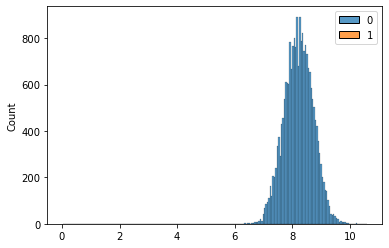

In [63]:
sns.histplot(boxcoxtrans)

In [64]:
len(list(boxcoxtrans))

2

<AxesSubplot:xlabel='sqft_living', ylabel='Count'>

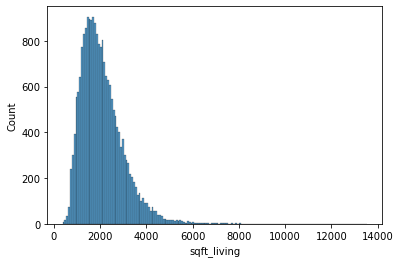

In [65]:
sns.histplot(MLdf['sqft_living'])

In [66]:

def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

In [67]:
normalized_living = normalize(MLdf.sqft_living)
normalized_living

0        0.061503
1        0.167046
2        0.030372
3        0.120729
4        0.099468
           ...   
21592    0.088079
21593    0.147304
21594    0.049355
21595    0.093394
21596    0.049355
Name: sqft_living, Length: 21592, dtype: float64

<AxesSubplot:xlabel='sqft_living', ylabel='Count'>

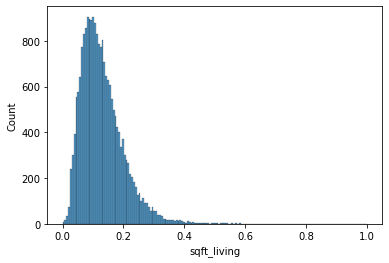

In [68]:
sns.histplot(normalized_living)

In [69]:
#still a bit skewed

In [70]:
log_sqft = np.log(MLdf.sqft_living)
log_sqft.describe()

count    21592.000000
mean         7.550616
std          0.424153
min          5.913503
25%          7.265430
50%          7.554859
75%          7.843849
max          9.513404
Name: sqft_living, dtype: float64

<AxesSubplot:xlabel='sqft_living', ylabel='Count'>

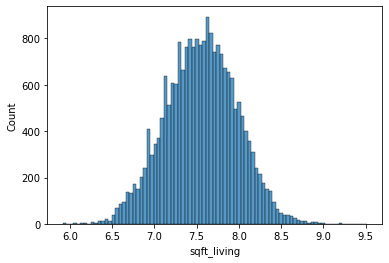

In [71]:
sns.histplot(log_sqft)

In [72]:
#better. get it to the MLdf.

In [73]:
MLdf['log_sqft_living'] = log_sqft

<ipython-input-73-810397afff08>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MLdf['log_sqft_living'] = log_sqft


In [74]:
MLdf.drop(columns=['sqft_living'])


,basement,rennovated,view,waterfront,grade,price,log_sqft_living
0,0,0,0,0,7,221900,7.073270
1,1,1,0,0,7,538000,7.851661
2,0,0,0,0,6,180000,6.646391
3,1,0,0,0,7,604000,7.580700
4,0,0,0,0,8,510000,7.426549
...,...,...,...,...,...,...,...
21592,0,0,0,0,8,360000,7.333023
21593,0,0,0,0,8,400000,7.745003
21594,0,0,0,0,7,402101,6.927558
21595,0,0,0,0,8,400000,7.377759


In [76]:
MLdf

,sqft_living,basement,rennovated,view,waterfront,grade,price,log_sqft_living
0,1180,0,0,0,0,7,221900,7.073270
1,2570,1,1,0,0,7,538000,7.851661
2,770,0,0,0,0,6,180000,6.646391
3,1960,1,0,0,0,7,604000,7.580700
4,1680,0,0,0,0,8,510000,7.426549
...,...,...,...,...,...,...,...,...
21592,1530,0,0,0,0,8,360000,7.333023
21593,2310,0,0,0,0,8,400000,7.745003
21594,1020,0,0,0,0,7,402101,6.927558
21595,1600,0,0,0,0,8,400000,7.377759


In [78]:
#the ones used for first try:
MLdf

,sqft_living,basement,rennovated,view,waterfront,grade,price,log_sqft_living
0,1180,0,0,0,0,7,221900,7.073270
1,2570,1,1,0,0,7,538000,7.851661
2,770,0,0,0,0,6,180000,6.646391
3,1960,1,0,0,0,7,604000,7.580700
4,1680,0,0,0,0,8,510000,7.426549
...,...,...,...,...,...,...,...,...
21592,1530,0,0,0,0,8,360000,7.333023
21593,2310,0,0,0,0,8,400000,7.745003
21594,1020,0,0,0,0,7,402101,6.927558
21595,1600,0,0,0,0,8,400000,7.377759


In [79]:
#input 

In [143]:
X=MLdf[['sqft_living','basement','rennovated','view','waterfront','grade',]]
y=df['price']


In [144]:
#split set and apply linear regression

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [146]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [147]:
regressor.predict(X_test)

array([593258.76065483, 719447.86113784, 785618.21724474, ...,
       434309.68122437, 555378.81436417, 404321.39041092])

In [148]:
regressor.score(X_test,y_test)

0.6024865251750402

In [149]:
y_pred = regressor.predict(X_test)

In [152]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,y_pred)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is: 154050.07
The mean squared error of the model in the test set is: 51620536585.56
The root mean squared error of the model in the test set is: 227201.53
The R2 of the model in the test set is: 0.60


In [153]:
#using gradient boost regression

In [154]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 3, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [155]:
clf.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=400)

In [156]:
clf.score(X_test,y_test)

0.6201691552074247

In [157]:
y_predic=clf.predict(X_test)

In [158]:
MAE = mean_absolute_error(y_test,y_predic)
MSE = mean_squared_error(y_test,y_predic)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,y_predic)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is: 143091.33
The mean squared error of the model in the test set is: 49324295304.89
The root mean squared error of the model in the test set is: 222090.74
The R2 of the model in the test set is: 0.62


In [ ]:
#slightly better than a monkey (random)
#lets try with a different input

In [159]:
X=df[['bedrooms','sqft_living','floors','waterfront','view','condition','grade','zipcode','rennovated','basement']]
y=df['price']


In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [161]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [163]:
regressor.predict(X_test)

array([508932.11630017, 704486.64711609, 794212.42623654, ...,
       448774.93066999, 500870.72433499, 374408.7770851 ])

In [164]:
regressor.score(X_test,y_test)

0.6186767538572219

In [165]:
y_pred = regressor.predict(X_test)

In [166]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,y_pred)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is: 149241.04
The mean squared error of the model in the test set is: 49518096429.57
The root mean squared error of the model in the test set is: 222526.62
The R2 of the model in the test set is: 0.62


In [169]:
#slighly better

In [ ]:
from sklearn import ensemble
clf2 = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 3, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [170]:
clf.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=400)

In [171]:
clf.score(X_test,y_test)

0.8337031389429046

In [172]:
y_predic=clf.predict(X_test)

In [173]:
MAE = mean_absolute_error(y_test,y_predic)
MSE = mean_squared_error(y_test,y_predic)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,y_predic)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is: 81170.98
The mean squared error of the model in the test set is: 21595074743.17
The root mean squared error of the model in the test set is: 146952.63
The R2 of the model in the test set is: 0.83


#better but it also included a lot of colinear variables and the mean MSE is super high